zadanie 1

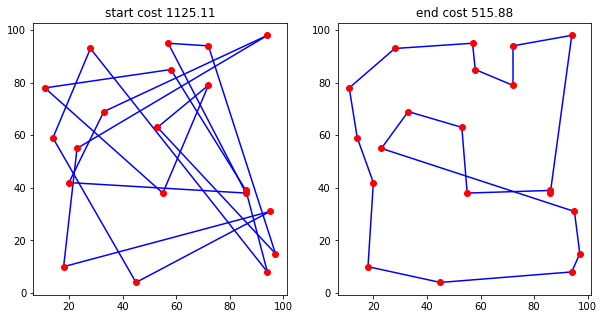

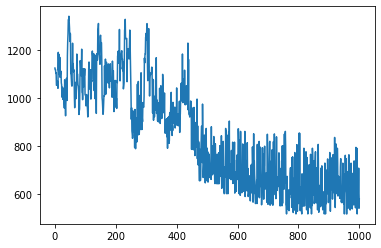

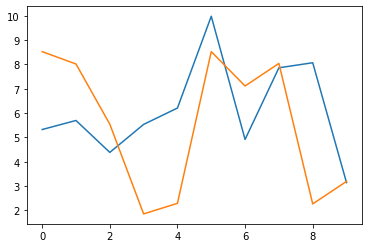

In [199]:
import math
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt


@dataclass
class SimulatedAnnealingConfig:
    initial_temperature = 2000
    factor = 0.989


class TravelingSalesmanProblem:
    def __init__(self, points_number, swap_mode):
        mode = {"arbitrary swap": self.arbitrary_swap_state, "consecutive swap": self.consecutive_swap_state}
        self.mode = mode[swap_mode]
        self.points_number = points_number
        self.state = np.random.randint(1, points_number * 5, size=(points_number, 2))

    def distance(self, p1, p2):
        return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

    def get_cost(self, path):
        return sum((self.distance(path[i + 1], path[i]) for i in range(self.points_number - 1))) + self.distance(
            path[self.points_number - 1], path[0])

    def arbitrary_swap_state(self):
        point1, point2 = np.random.randint(0, self.points_number, size=2)
        new_state = np.copy(self.state)
        new_state[[point1, point2]] = new_state[[point2, point1]]
        return new_state

    def consecutive_swap_state(self):
        point = np.random.randint(0, self.points_number)
        min_dist = math.inf
        new_state = np.copy(self.state)
        idx = 0

        for i in range(self.points_number):
            curr_dist = self.distance(new_state[i], new_state[point])
            if curr_dist < min_dist and i != point:
                min_dist = curr_dist
                idx = i
        new_state[[point, idx]] = new_state[[idx, point]]

        return new_state

    def swap_state(self):
        return self.mode()

    def get_state(self):
        return self.state


class SimulatedAnnealing:

    def __init__(self, config: SimulatedAnnealingConfig, problem):
        self.initial_temperature = config.initial_temperature
        self.factor = config.factor
        self.problem = problem
        self.result = math.inf
        self.costs = None

    def annealing(self):
        T = self.initial_temperature
        best_cost = self.problem.get_cost(self.problem.get_state())
        self.costs = [best_cost]

        for _ in range(1000):
            curr_state = self.problem.swap_state()
            curr_cost = self.problem.get_cost(curr_state)

            if curr_cost < best_cost:
                best_cost = curr_cost
                self.problem.state = curr_state
            else:
                val = np.random.uniform()
                if val < np.exp((best_cost - curr_cost) / T):
                    best_cost = curr_cost
                    self.problem.state = curr_state

            T *= self.factor
            self.costs.append(curr_cost)
        self.result = best_cost


def get_result(self):
    return self.result, self.problem.get_state()


def print_solution(start_state, end_state, start_cost, end_cost):
    fig = plt.figure(figsize=(10, 5))
    plt.axis('off')

    ax1 = fig.add_subplot(121)
    ax1.set_title('start cost ' + str(round(start_cost,2)))
    ax2 = fig.add_subplot(122)
    ax2.set_title('end cost ' + str(round(end_cost,2)))

    for i, j in zip(start_state[:-1], start_state[1:]):
        ax1.plot([i[0], j[0]], [i[1], j[1]], 'b')
    ax1.plot([start_state[0, 0], start_state[-1, 0]], [start_state[0, 1], start_state[-1, 1]], 'b')

    for i in start_state:
        ax1.plot(i[0], i[1], 'ro')

    for i, j in zip(end_state[:-1], end_state[1:]):
        ax2.plot([i[0], j[0]], [i[1], j[1]], 'b')
    ax2.plot([end_state[0, 0], end_state[-1, 0]], [end_state[0, 1], end_state[-1, 1]], 'b')

    for i in start_state:
        ax2.plot(i[0], i[1], 'ro')
    plt.show()


def generate_points():
    pass


tsp = TravelingSalesmanProblem(20, "arbitrary swap")

start_state = tsp.get_state()
start_cost = tsp.get_cost(start_state)

algo = SimulatedAnnealing(SimulatedAnnealingConfig(), tsp)
algo.annealing()

end_state = tsp.get_state()
end_cost = tsp.get_cost(end_state)

print_solution(start_state,end_state, start_cost, end_cost)

def generate_points_uniform(n, size):
    return np.random.uniform((0, 0), (size, size), (n, 2))

def generate_points_normal(n, size):
    mu=(size//2, size//2)
    sigma=(5 * np.identity(2))
    return np.random.multivariate_normal(mu, sigma, n)